## Problem 2: Points to map (7 points)
 
In this problem we continue to learn how to turn latitude and longitude coordinates into geometries.

**Our aim is to plot a map based on a set of longitude and latitude coordinates that are stored in a csv file.** 
The coordinates are in WGS84 decimal degrees (EPSG:4326), and the data is stored in `some_posts.csv` comma separated file in the folder `data`. First rows of the data look like this:
 
```
lat,lon,timestamp,userid
-24.980792492,31.484633302,2015-07-07 03:02,66487960
-25.499224667,31.508905612,2015-07-07 03:18,65281761
-24.342578456,30.930866066,2015-03-07 03:38,90916112
-24.85461393,31.519718439,2015-10-07 05:04,37959089
```

The data has 81379 rows and consists of locations and times of de-identified social media posts inside Kruger national park in South Africa:

| Column | Description |
|--------|-------------|
| lat | y-coordinate of the post |
| lon | x-coordinate of the post |
| timestamp | Time when the post was uploaded |
| userid | unique id for each user|

*Note: Although the data is based on real social media data, the userids and timestamps have been randomized making it impossible to link the data to the original posts.*

**First:**

- Import the needed modules
- Read the data from `data/some_posts.csv` into a Pandas dataframe called `data`
- Create an empty column called `geometry` where you will store shapely Point objects
- Insert Point objects into the column `geometry` based on the coordinate columns 

**HINTS:**

You want to create a Shapely point *on each row*, based on columns `'lon'` and `'lat'`. You can achieve this by using one of these alternative approaches:

- a `for`-loop and `iterrows()` to use the Point constructor on each row
- the [apply method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html) to apply the  Point constructor on each row. 
- a `for`-loop and a zipped object containing lon and lat (created using `zip`) and use the Point constructor on each lat, lon coordinate pair.

You can find more hints about these approaches on the [course webpages](https://autogis-site.readthedocs.io/en/latest/lessons/L2/exercise-2.html#hints).





In [1]:
# REPLACE THE ERROR BELOW WITH YOUR OWN CODE
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import os

data = pd.read_csv(os.path.join('data','some_posts.csv'))
data[['lat','lon']] = data[['lat','lon']].astype(float)


In [2]:
data['geometry'] = data[['lon','lat']].apply(lambda points: Point((points.tolist())), 1)

c:\Users\usuario\miniconda3\envs\ml4eo\lib\site-packages\pandas\core\dtypes\cast.py:118: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


In [3]:
# NON-EDITABLE CODE CELL FOR TESTING YOUR SOLUTION

# Check the result
print("Number of rows:", len(data))

Number of rows: 81379


In [4]:
# NON-EDITABLE CODE CELL FOR TESTING YOUR SOLUTION

# Check the result
print(data['geometry'].head())

0    POINT (31.484633302 -24.980792492)
1    POINT (31.508905612 -25.499224667)
2    POINT (30.930866066 -24.342578456)
3     POINT (31.519718439 -24.85461393)
4    POINT (31.520835558 -24.921068894)
Name: geometry, dtype: object


**Next:**
- Convert that DataFrame into a GeoDataFrame using geopandas [GeoDataFrame constructor](https://geopandas.org/reference/geopandas.GeoDataFrame.html). See [hints](https://autogis-site.readthedocs.io/en/latest/lessons/L2/exercise-2.html#hints) for more details. 

- Update the CRS for coordinate system as WGS84 (i.e. epsg code: 4326)

- Save the data into a Shapefile called `Kruger_posts.shp`



In [5]:
# REPLACE THE ERROR BELOW WITH YOUR OWN CODE
from pyproj import CRS
geo = gpd.GeoDataFrame(data=data, crs=CRS.from_epsg(4326).to_wkt())
fp = os.path.join('data','Kruger_posts.shp')
geo.to_file(fp)

In [6]:
# NON-EDITABLE CODE CELL FOR TESTING YOUR SOLUTION

# Check the geodataframe head
print("Number of rows:", len(geo))
print(geo.head())

Number of rows: 81379
         lat        lon         timestamp    userid  \
0 -24.980792  31.484633  2015-07-07 03:02  66487960   
1 -25.499225  31.508906  2015-07-07 03:18  65281761   
2 -24.342578  30.930866  2015-03-07 03:38  90916112   
3 -24.854614  31.519718  2015-10-07 05:04  37959089   
4 -24.921069  31.520836  2015-10-07 05:19  27793716   

                     geometry  
0  POINT (31.48463 -24.98079)  
1  POINT (31.50891 -25.49922)  
2  POINT (30.93087 -24.34258)  
3  POINT (31.51972 -24.85461)  
4  POINT (31.52084 -24.92107)  


In [7]:
# NON-EDITABLE CODE CELL FOR TESTING YOUR SOLUTION

# Check that the output file exists
import os
assert os.path.isfile(fp), "output shapefile does not exist"

**Finally:** 
- **Create a simple map of the points** using the `plot()` -funtion. 

<AxesSubplot:>

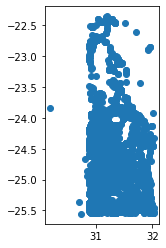

In [8]:
# REPLACE THE ERROR BELOW WITH YOUR OWN CODE
geo.plot()

- *Optional:* Download the output shapefile and create a map in a gis-software (for example, overlay the points with a basemap). If yo do this, remember to upload the  map as a png image to this repository and add link to the image file to this notebook:

YOUR ANSWER HERE

Well done! Now you can move on to [Exercise-2-problem-3.ipynb](Exercise-2-problem-3.ipynb).